In [75]:
from utils.gsheet import GoogleSheet
from data_analysis import *
from constant import *
from app_utils import *

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
plt.style.use("seaborn")

In [2]:
gs = GoogleSheet.read_from(STUDY_TIME_TABLE_NAME)
df_dur = gs.sheet(sheet_name=SHEET1, least_col_name=START_TIME)
df_eve = gs.sheet(sheet_name=SHEET2, least_col_name=NAME)
df = merge_dur_eve(df_dur, df_eve)
    
    
df.head()

,name,date,start_time,end_time
0,Alpha,2020.11.09,11:00,12:00
1,Delta,2020.11.09,11:00,12:00
2,Delta,2020.11.09,08:00,15:00
3,Beta,2020.11.09,08:00,15:00
4,Diqing,2020.11.09,19:00,23:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        116 non-null    object
 1   date        116 non-null    object
 2   start_time  116 non-null    object
 3   end_time    116 non-null    object
dtypes: object(4)
memory usage: 4.5+ KB


In [7]:
df_all = preprocess_data(df)
df_all.head()

/home/congyu/congyu_program/pythons/inits/p_study_time_board/data_analysis.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[WEEKDAY] = df[DATE_DT].dt.week


,name,date,start_time,end_time,start_time_datetime,end_time_datetime,minutes,date_datetime,weekday
0,Alpha,2020.11.09,11:00,12:00,1900-01-01 11:00:00,1900-01-01 12:00:00,60.0,2020-11-09,46
1,Delta,2020.11.09,11:00,12:00,1900-01-01 11:00:00,1900-01-01 12:00:00,60.0,2020-11-09,46
2,Delta,2020.11.09,08:00,15:00,1900-01-01 08:00:00,1900-01-01 15:00:00,420.0,2020-11-09,46
3,Beta,2020.11.09,08:00,15:00,1900-01-01 08:00:00,1900-01-01 15:00:00,420.0,2020-11-09,46
4,Diqing,2020.11.09,19:00,23:00,1900-01-01 19:00:00,1900-01-01 23:00:00,240.0,2020-11-09,46


In [15]:
def to_personal_analysis_table(df, name):
    """

    :param df:
    :param name:
    :return:
    """

    df_r = df.loc[df[NAME] == name, :]
    df_r = df_r.groupby(DATE)[MINUTES].apply(sum)
    df_r = df_r.reset_index()
    
    df_r[DATE_DT] = pd.to_datetime(df_r[DATE])
    df_r[WEEKDAY] = df_r[DATE_DT].dt.day_name()

    return df_r

In [16]:
df_user = to_personal_analysis_table(df_all, "Congyu")
df_user.head()

,date,minutes,date_datetime,weekday
0,2020.11.09,180.0,2020-11-09,Monday
1,2020.11.11,115.0,2020-11-11,Wednesday
2,2020.11.15,140.0,2020-11-15,Sunday
3,2020.11.16,239.0,2020-11-16,Monday
4,2020.11.17,355.0,2020-11-17,Tuesday


In [20]:
df_congyu = df_all.loc[df_all[NAME] == "Congyu", :]
df_congyu.head()

,name,date,start_time,end_time,start_time_datetime,end_time_datetime,minutes,date_datetime,weekday
6,Congyu,2020.11.09,15:30,18:30,1900-01-01 15:30:00,1900-01-01 18:30:00,180.0,2020-11-09,46
8,Congyu,2020.11.11,09:30,11:25,1900-01-01 09:30:00,1900-01-01 11:25:00,115.0,2020-11-11,46
10,Congyu,2020.11.15,11:00,12:30,1900-01-01 11:00:00,1900-01-01 12:30:00,90.0,2020-11-15,46
12,Congyu,2020.11.15,17:05,17:55,1900-01-01 17:05:00,1900-01-01 17:55:00,50.0,2020-11-15,46
17,Congyu,2020.11.16,16:30,16:45,1900-01-01 16:30:00,1900-01-01 16:45:00,15.0,2020-11-16,47


In [72]:
def plot_study_stream(df):
    date = df[DATE].tolist()
    ts = df[START_TIME_DT].tolist()
    te = df[END_TIME_DT].tolist()

    fig = plt.figure(figsize=(20, 20))
    ax = plt.subplot()

    for i in range(len(df)):
        ax.plot([date[i], date[i]], [ts[i], te[i]], ".-", linewidth=20)

    ax.yaxis.set_major_locator(HourLocator())
    ax.yaxis.set_major_formatter(DateFormatter('%H:%M'))
    
    plt.axhline(y=datetime.strptime("08:00","%H:%M"), color="r", ls=":")
    plt.axhline(y=datetime.strptime("12:30","%H:%M"), color="r", ls=":")
    plt.axhline(y=datetime.strptime("18:30","%H:%M"), color="r", ls=":")
    
    plt.ylim((datetime.strptime("00:00","%H:%M"), datetime.strptime("23:59","%H:%M")))
    plt.gca().invert_yaxis()
    plt.show()

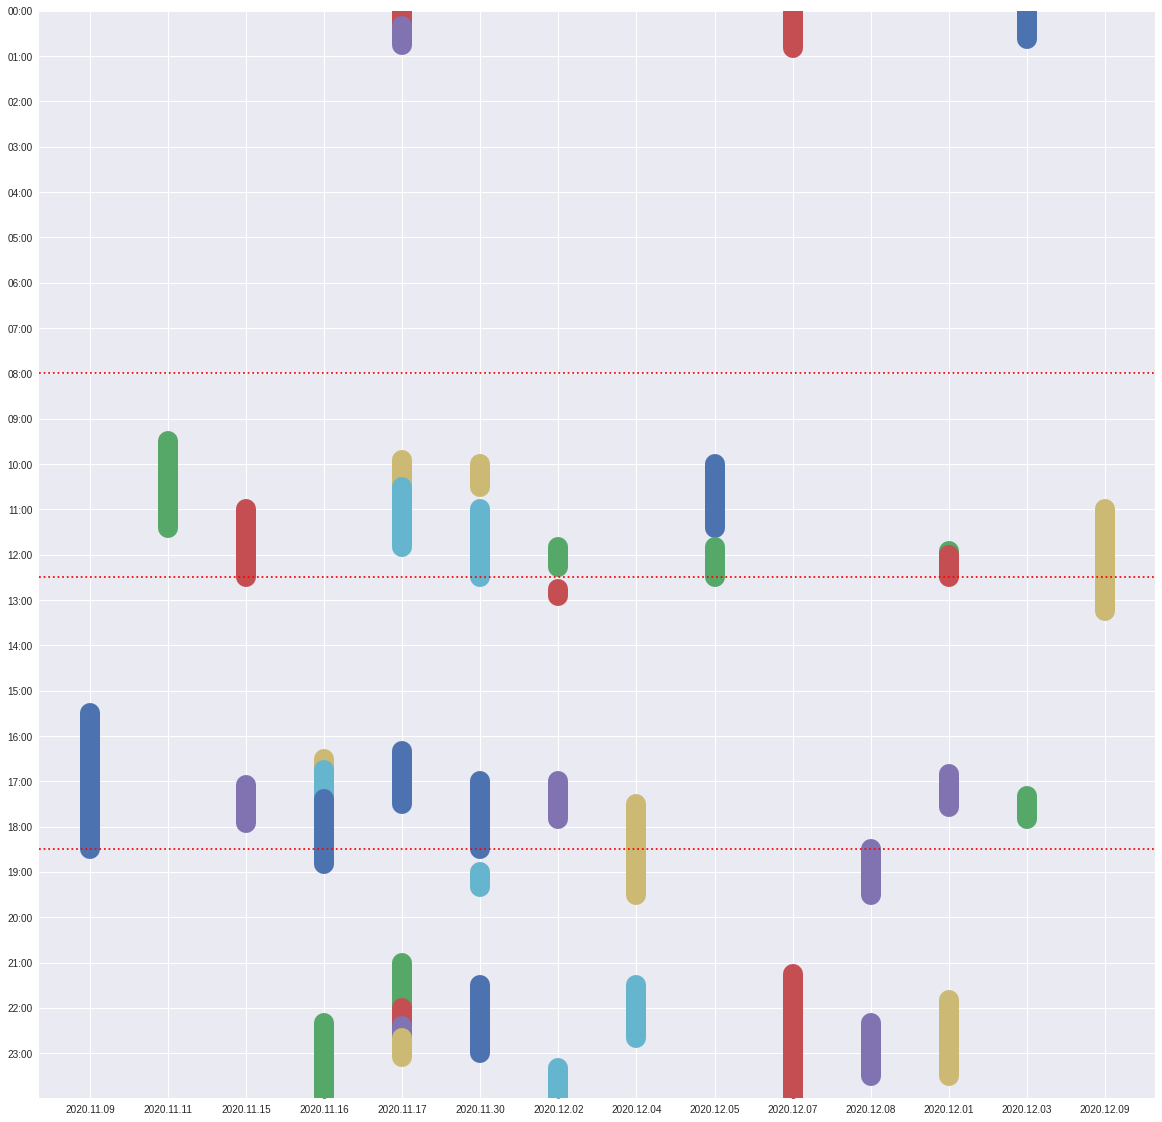

In [74]:
plot_study_stream(df_congyu)